In [54]:
# Importing libraries

# For numerical computation on nd-arrays
import numpy as np

# For data analysis and manipulations with dataset
import pandas as pd
pd.set_option("display.max_columns", None)

# Data visualization library
import matplotlib.pyplot as plt

# Data visualization library built upon matplotlib
import seaborn as sns
 
# To ignore warnings related to versions mismatch or updates
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [55]:
# Features - http://kdd.ics.uci.edu/databases/kddcup99/kddcup.names
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment',
            'urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
            'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login',
            'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
            'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
            'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
            'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'intrusion_type']

In [56]:
# Dataset -http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
df = pd.read_csv('kddcup.data_10_percent_corrected', names = features, header = None)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [57]:
print('Number of data points: ',df.shape[0])
print('Number of features: ', df.shape[1])

Number of data points:  494021
Number of features:  42


In [58]:
output_labels = df['intrusion_type'].unique()
print(f"There are {len(output_labels)} output labels and are: {output_labels}")

There are 23 output labels and are: ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [59]:
# Data cleaning

In [60]:
# Checking for null values
for index, value in df.isnull().sum().items():
    if value > 0:
        print(f"There are {value} missing values in column - {index}")


In [61]:
# There are no null values
# Checking for duplicate rows
print(f"Duplicate rows - {df.duplicated().sum()}")

Duplicate rows - 348435


In [62]:
# Removing duplicate rows
df.drop_duplicates(keep='first', inplace=True)
print(f"Duplicate rows - {df.duplicated().sum()}")

Duplicate rows - 0


In [63]:
# Saving the cleaned dataset
df.to_pickle('clean_dataset.pkl')

In [64]:
df = pd.read_pickle('clean_dataset.pkl')
df.shape

(145586, 42)

In [65]:
# Exploratory Data Analysis

In [66]:
# Distribution of classes in target label
dist = df['intrusion_type'].value_counts()
for name, count in dist.items():
    print(f"Number of data points in class: {name.center(17)} is", end=' ')
    print(f"{count} ({np.round(count / sum(dist) * 100, 3)}%)")


Number of data points in class:      normal.      is 87832 (60.33%)
Number of data points in class:      neptune.     is 51820 (35.594%)
Number of data points in class:       back.       is 968 (0.665%)
Number of data points in class:     teardrop.     is 918 (0.631%)
Number of data points in class:       satan.      is 906 (0.622%)
Number of data points in class:    warezclient.   is 893 (0.613%)
Number of data points in class:      ipsweep.     is 651 (0.447%)
Number of data points in class:       smurf.      is 641 (0.44%)
Number of data points in class:     portsweep.    is 416 (0.286%)
Number of data points in class:        pod.       is 206 (0.141%)
Number of data points in class:       nmap.       is 158 (0.109%)
Number of data points in class:   guess_passwd.   is 53 (0.036%)
Number of data points in class:  buffer_overflow. is 30 (0.021%)
Number of data points in class:    warezmaster.   is 20 (0.014%)
Number of data points in class:       land.       is 19 (0.013%)
Number of 

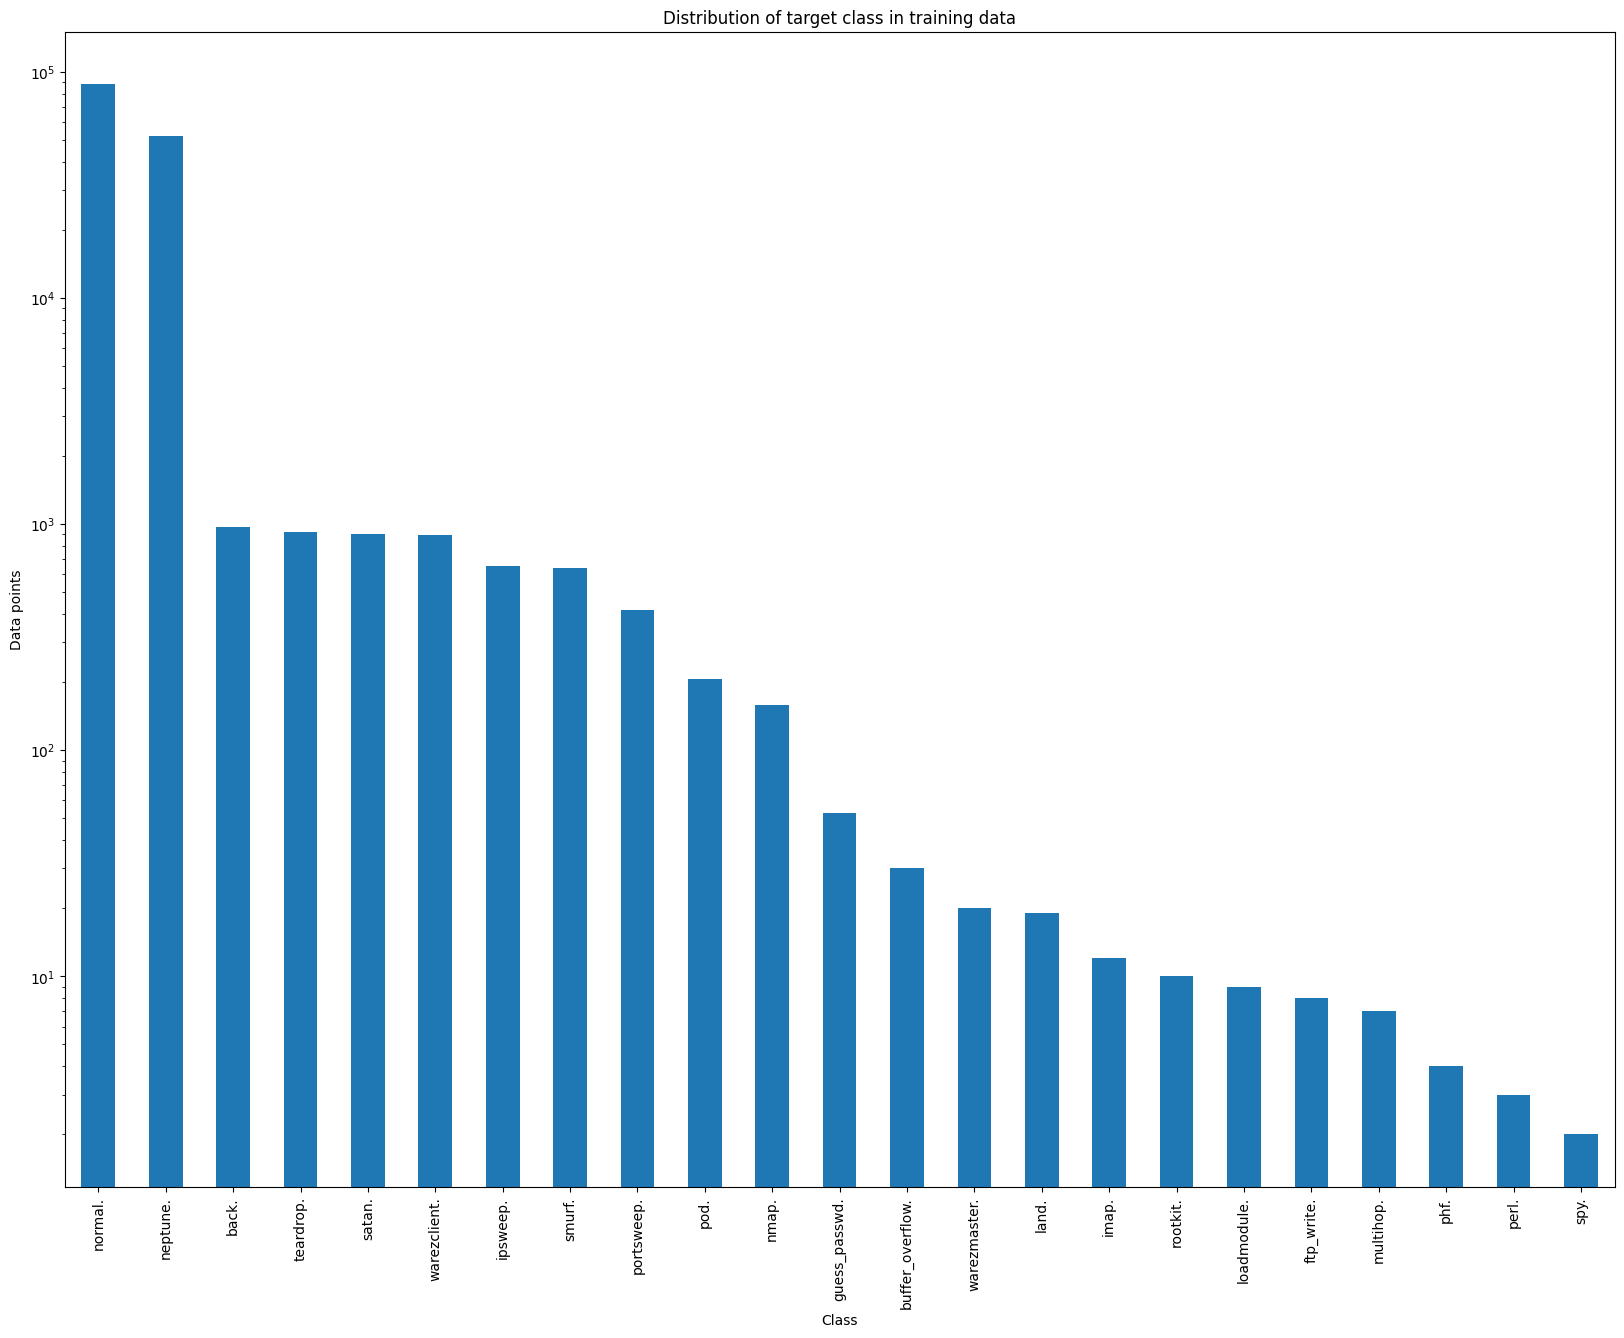

In [67]:
plt.figure(figsize=(20,15))
plt.yscale("log")
dist.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points')
plt.title('Distribution of target class in training data')
plt.show()

In [68]:
# Most of the data points are from "normal" (good connections) category which is around 60.33 %.

# In the categories that belong to bad connections, "neptune." (35.594 %) and "back." (0.665 %) have
# the highest no. of data points.

# Classes "rootkit.", "loadmodule.", "ftp_write.", "multihop.", "phf.", "perl.", "spy." have the least\
# no. of data points with less than 10 data points per class.

# The dataset is highly imbalanced, thus we will need to build a model which should be able to
# classify data points from these low distribution classes accurately.

# As the dataset is highly imbalanced, we will need to build a model which should be able to
# classify the INTRUSION categories accurately.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'normal.'),
  Text(1, 0, 'buffer_overflow.'),
  Text(2, 0, 'loadmodule.'),
  Text(3, 0, 'perl.'),
  Text(4, 0, 'neptune.'),
  Text(5, 0, 'smurf.'),
  Text(6, 0, 'guess_passwd.'),
  Text(7, 0, 'pod.'),
  Text(8, 0, 'teardrop.'),
  Text(9, 0, 'portsweep.'),
  Text(10, 0, 'ipsweep.'),
  Text(11, 0, 'land.'),
  Text(12, 0, 'ftp_write.'),
  Text(13, 0, 'back.'),
  Text(14, 0, 'imap.'),
  Text(15, 0, 'satan.'),
  Text(16, 0, 'phf.'),
  Text(17, 0, 'nmap.'),
  Text(18, 0, 'multihop.'),
  Text(19, 0, 'warezmaster.'),
  Text(20, 0, 'warezclient.'),
  Text(21, 0, 'spy.'),
  Text(22, 0, 'rootkit.')])

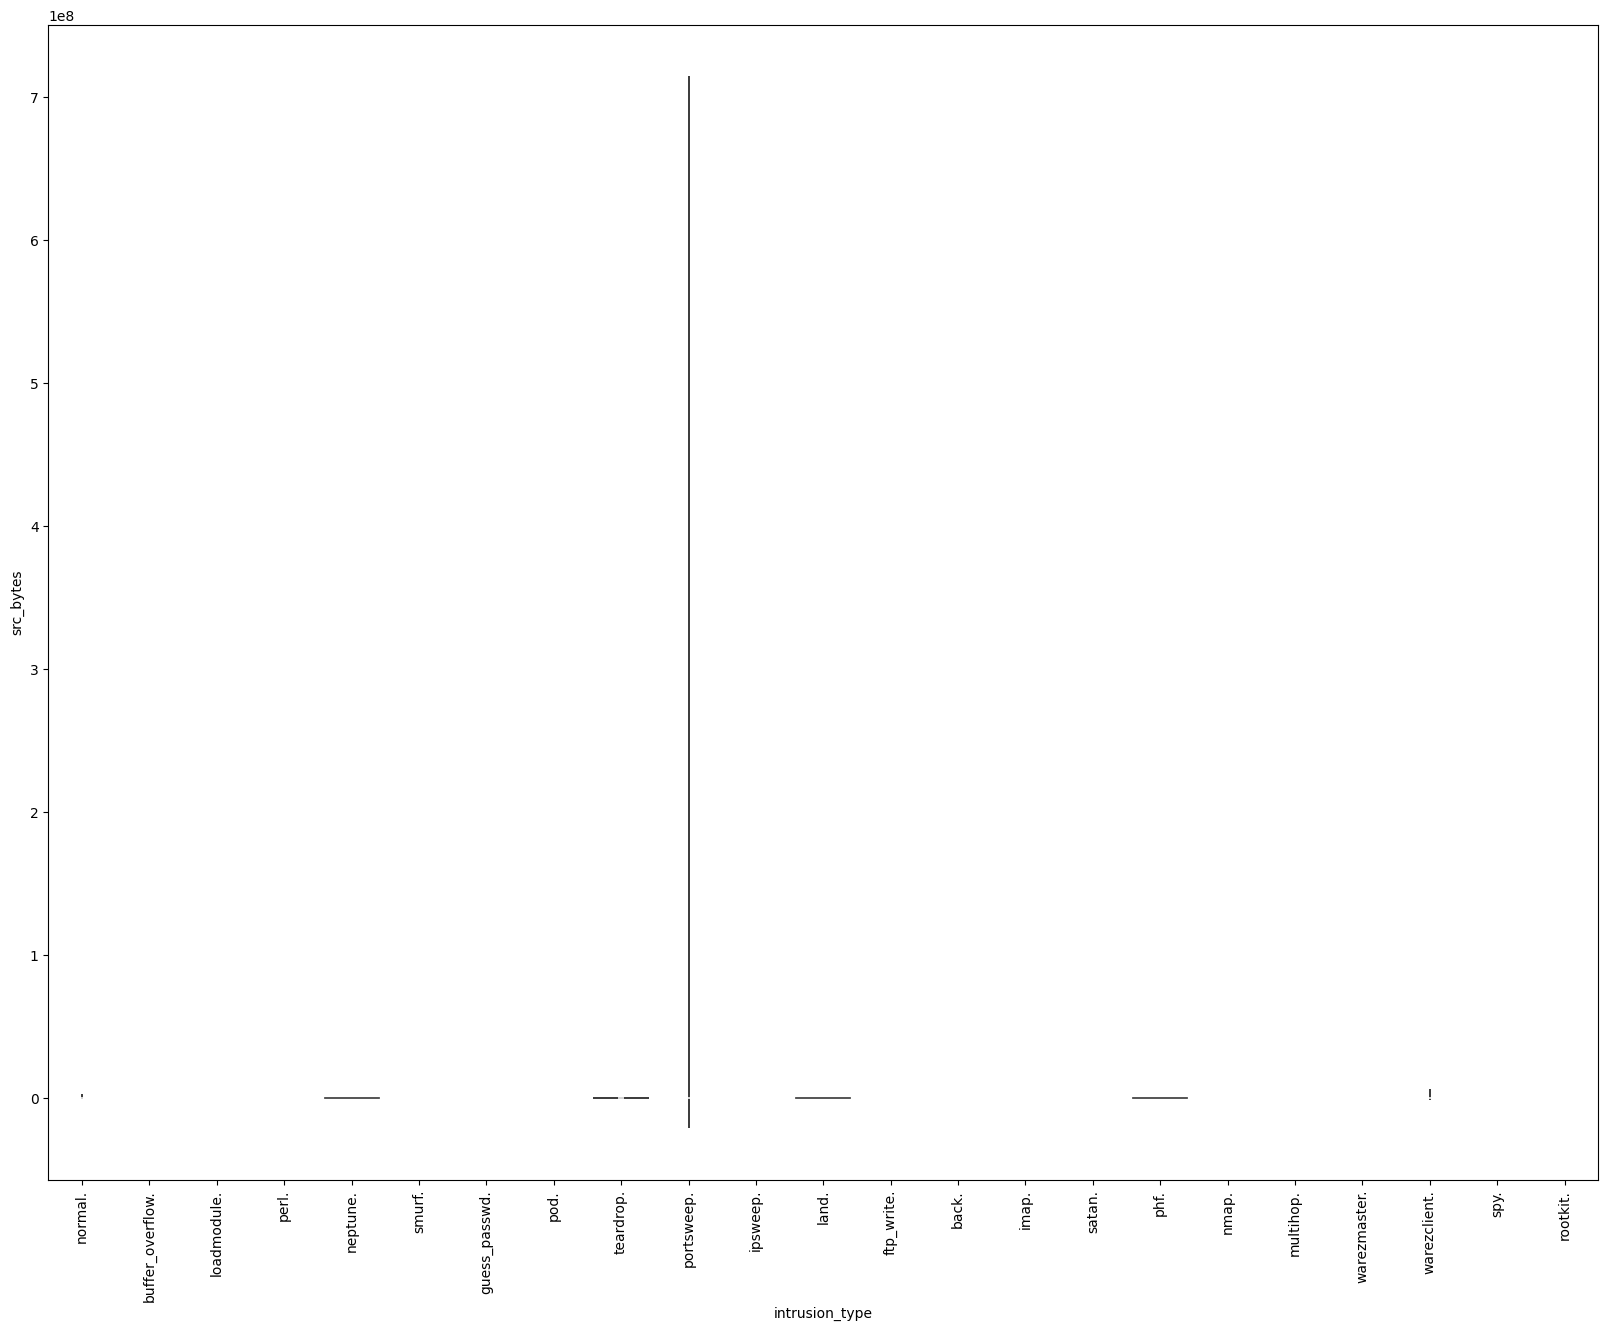

In [69]:
# Uni-variate analysis
plt.figure(figsize=(20,15))
sns.violinplot(x="intrusion_type", y="src_bytes", data=df)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'normal.'),
  Text(1, 0, 'buffer_overflow.'),
  Text(2, 0, 'loadmodule.'),
  Text(3, 0, 'perl.'),
  Text(4, 0, 'neptune.'),
  Text(5, 0, 'smurf.'),
  Text(6, 0, 'guess_passwd.'),
  Text(7, 0, 'pod.'),
  Text(8, 0, 'teardrop.'),
  Text(9, 0, 'portsweep.'),
  Text(10, 0, 'ipsweep.'),
  Text(11, 0, 'land.'),
  Text(12, 0, 'ftp_write.'),
  Text(13, 0, 'back.'),
  Text(14, 0, 'imap.'),
  Text(15, 0, 'satan.'),
  Text(16, 0, 'phf.'),
  Text(17, 0, 'nmap.'),
  Text(18, 0, 'multihop.'),
  Text(19, 0, 'warezmaster.'),
  Text(20, 0, 'warezclient.'),
  Text(21, 0, 'spy.'),
  Text(22, 0, 'rootkit.')])

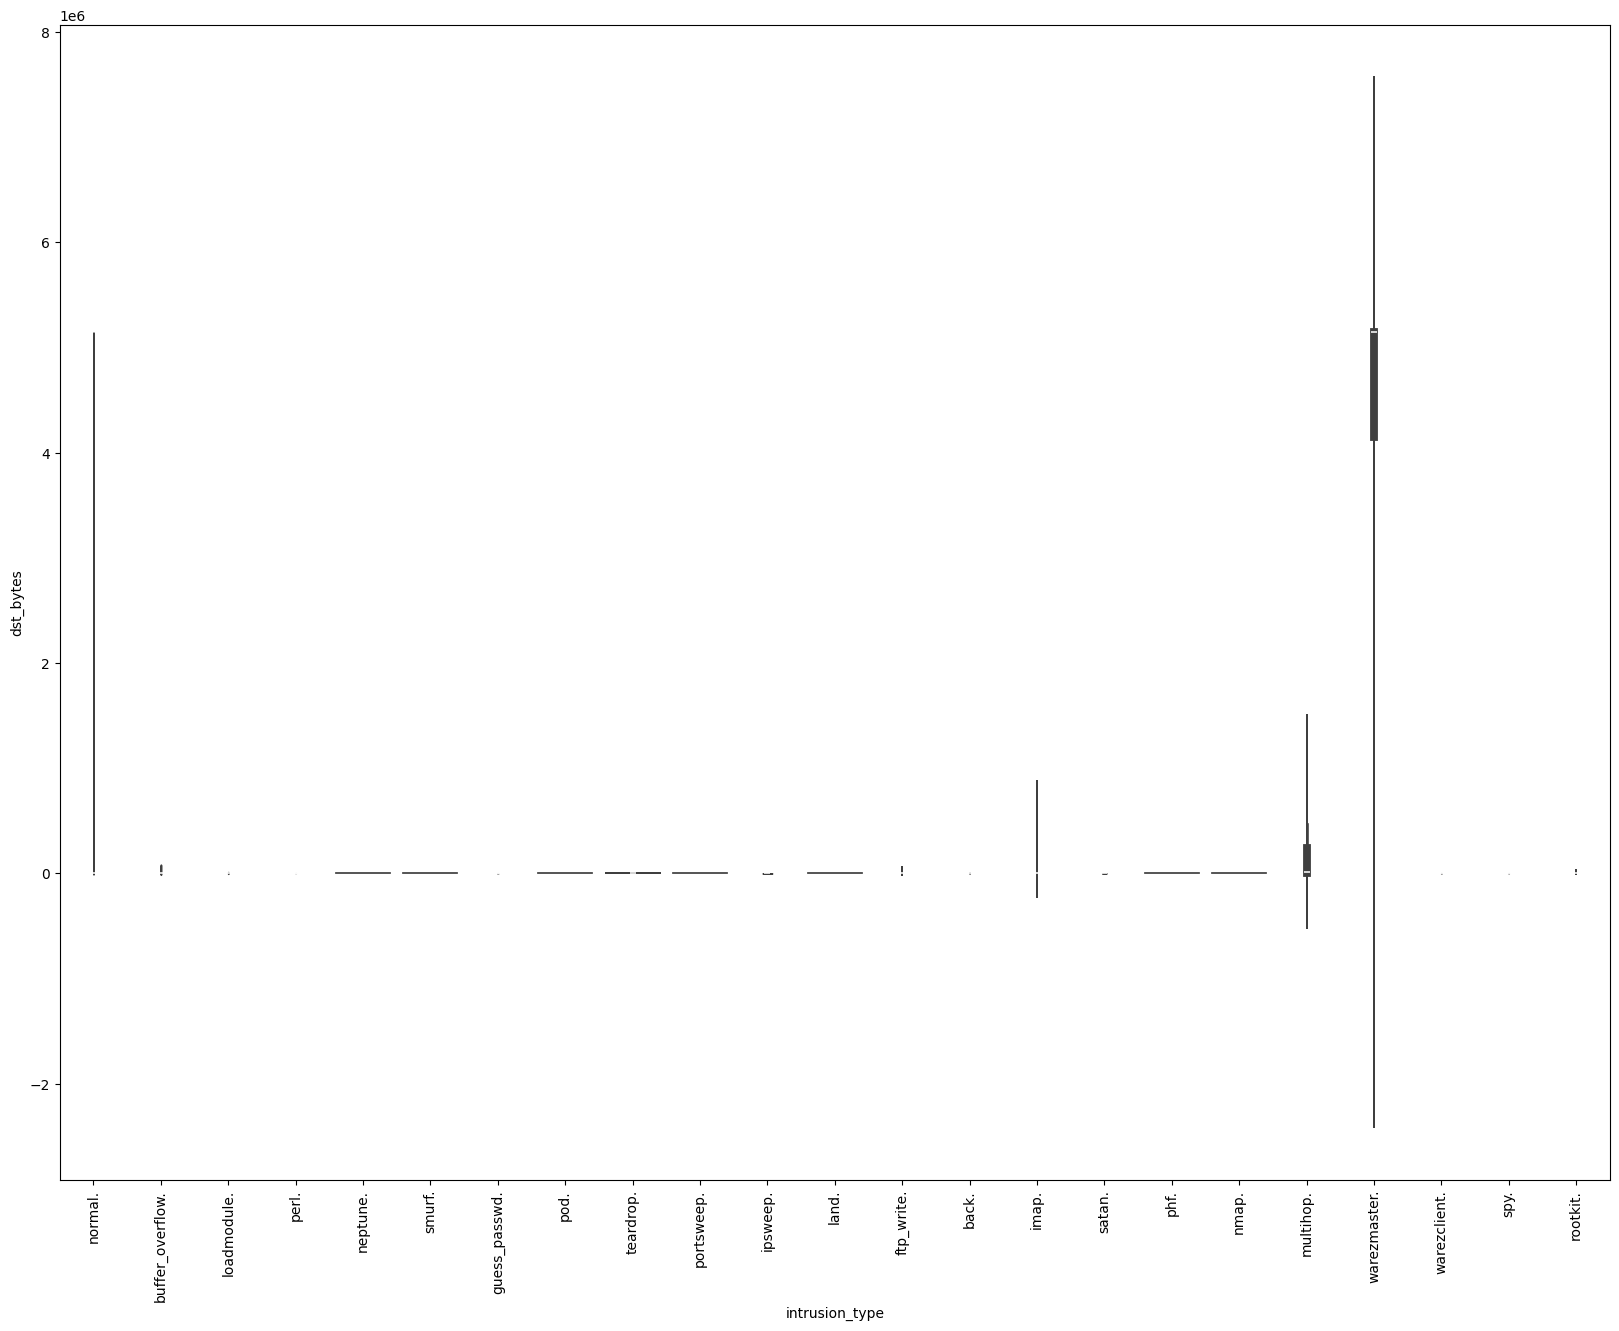

In [70]:
plt.figure(figsize=(20,15))
sns.violinplot(x="intrusion_type", y="dst_bytes", data=df)
plt.xticks(rotation=90)

In [71]:
# Using src_bytes as a feature for analysis, the intrusion category "portsweep" is distinguishable
# from rest of the categories

# Using dest_bytes as a feature for analysis, the intrusion categories "normal", "imap", "multihop"
# and "warezmaster" are distinguishable from rest of the categories.

# As we have relatively high no of classes, the Univariate analysis using boxplots and violin plots
# do not give us clear and satisfactory results

# Thus, we can go with pairplots for BiVariate Analysis or we can go with PCA/TSNE
# to reduce the no. of dimensions and perform Bi/Tri-Variate Analysis.

<Axes: >

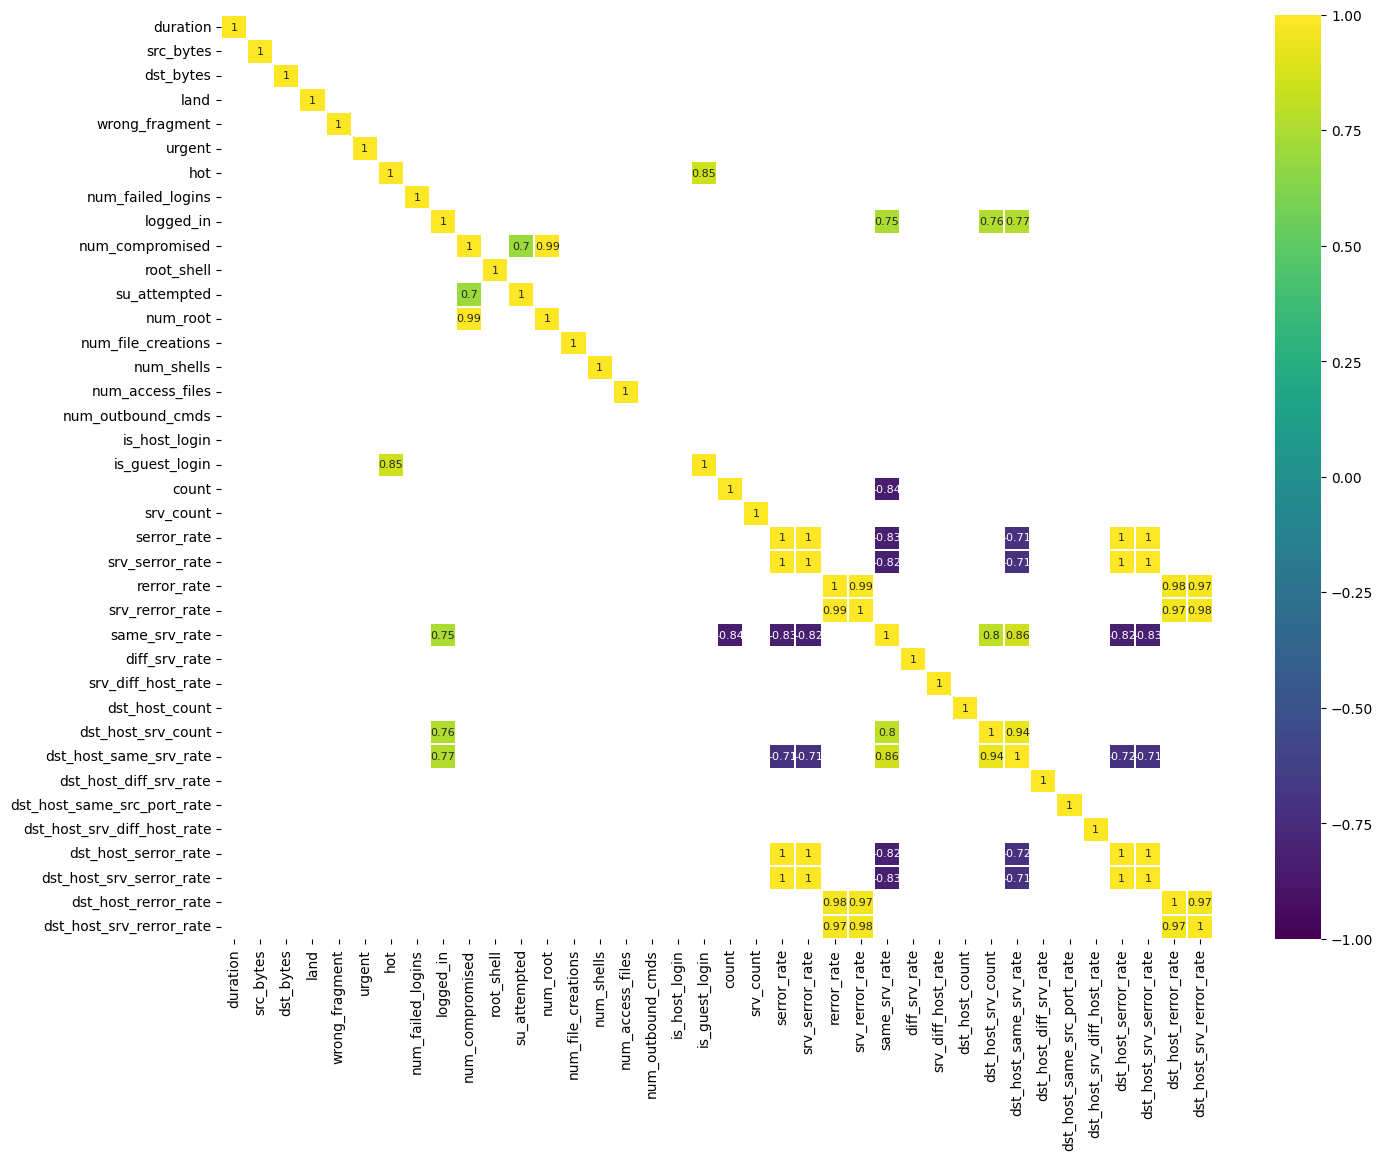

In [72]:
# Analysing feature to feature relationship

df_num = df.select_dtypes(include = ['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8})

array([[<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'src_bytes'}>,
        <Axes: title={'center': 'dst_bytes'}>,
        <Axes: title={'center': 'land'}>,
        <Axes: title={'center': 'wrong_fragment'}>,
        <Axes: title={'center': 'urgent'}>],
       [<Axes: title={'center': 'hot'}>,
        <Axes: title={'center': 'num_failed_logins'}>,
        <Axes: title={'center': 'logged_in'}>,
        <Axes: title={'center': 'num_compromised'}>,
        <Axes: title={'center': 'root_shell'}>,
        <Axes: title={'center': 'su_attempted'}>],
       [<Axes: title={'center': 'num_root'}>,
        <Axes: title={'center': 'num_file_creations'}>,
        <Axes: title={'center': 'num_shells'}>,
        <Axes: title={'center': 'num_access_files'}>,
        <Axes: title={'center': 'num_outbound_cmds'}>,
        <Axes: title={'center': 'is_host_login'}>],
       [<Axes: title={'center': 'is_guest_login'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title

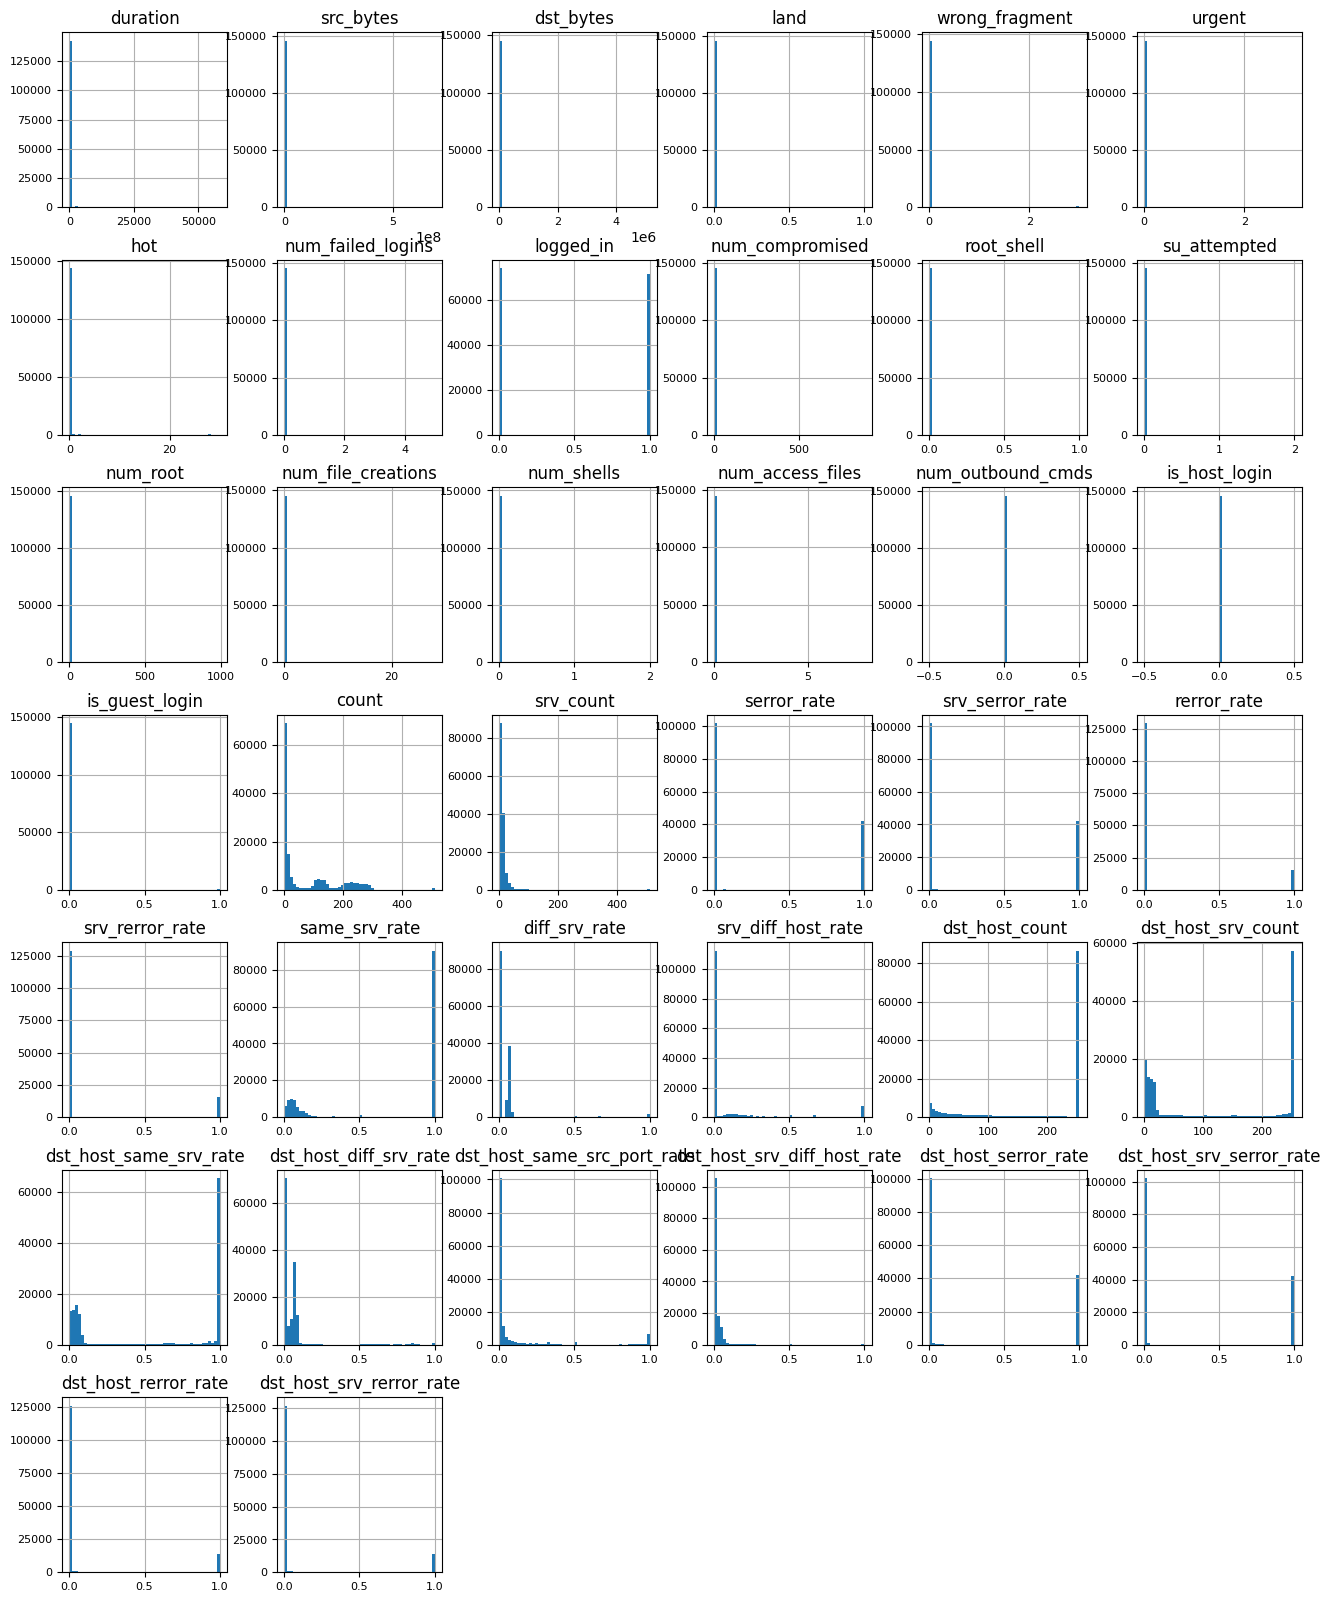

In [73]:
# Distribution of predictors/features
# A `histogram`_ is a representation of the distribution of data
# This function calls `matplotlib.pyplot.hist`, on each series in the DataFrame
# resulting in one histogram per column
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

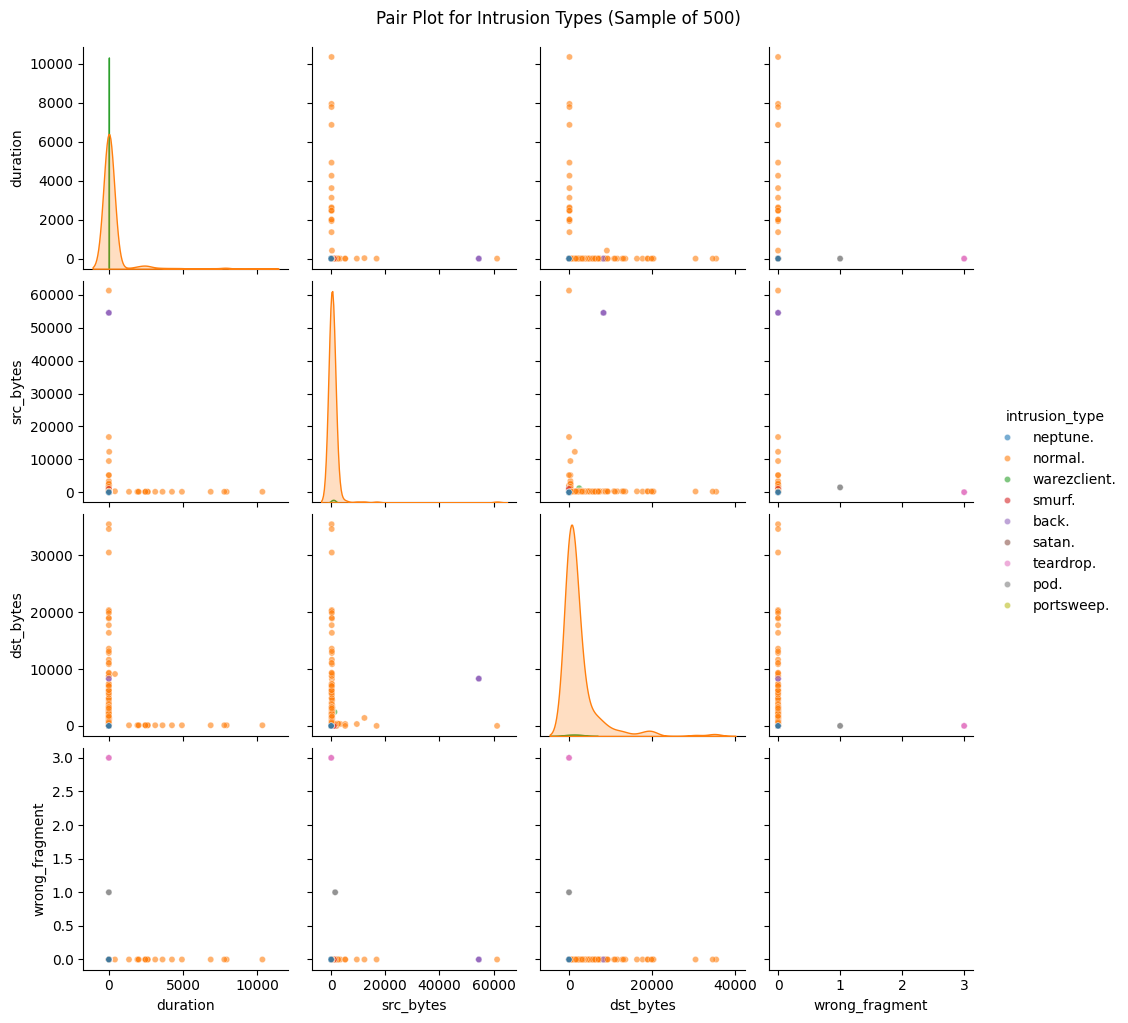

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample 500 rows randomly to avoid long plotting time
df_sample = df.sample(n=500, random_state=42)

# Create pair plot with lighter settings
sns.pairplot(
    df_sample,
    hue='intrusion_type',
    vars=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment'],
    kind='scatter',
    plot_kws={'s': 20, 'alpha': 0.6}  # Smaller marker size and transparency
)

plt.suptitle("Pair Plot for Intrusion Types (Sample of 500)", y=1.02)
plt.show()


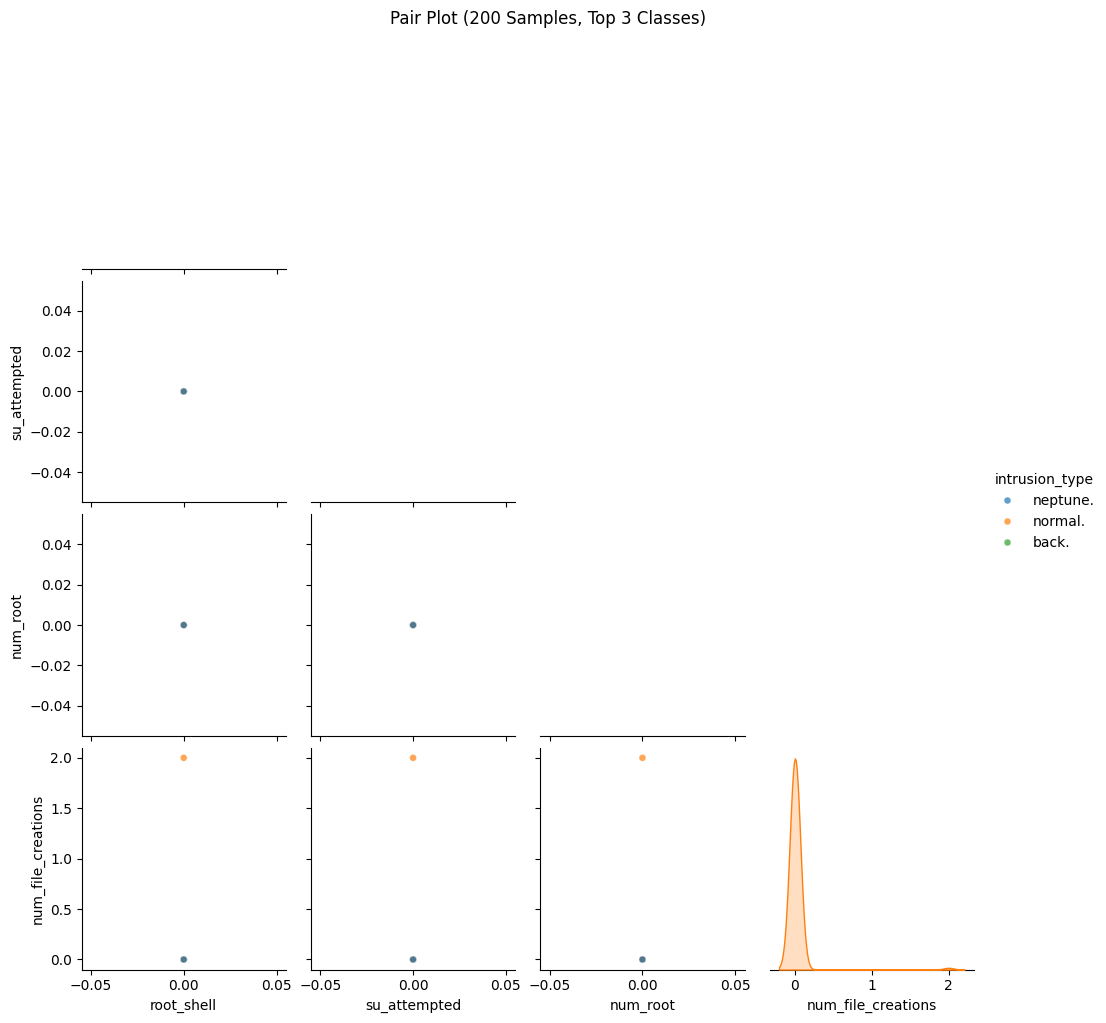

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 3 intrusion classes to reduce clutter
top_classes = df['intrusion_type'].value_counts().nlargest(3).index
df_filtered = df[df['intrusion_type'].isin(top_classes)]

# Sample only 200 rows
df_sample = df_filtered.sample(n=200, random_state=42)

# Plot
sns.pairplot(
    df_sample,
    hue='intrusion_type',
    vars=['root_shell', 'su_attempted', 'num_root', 'num_file_creations'],
    corner=True,
    plot_kws={'s': 25, 'alpha': 0.7}
)

plt.suptitle("Pair Plot (200 Samples, Top 3 Classes)", y=1.02)
plt.show()


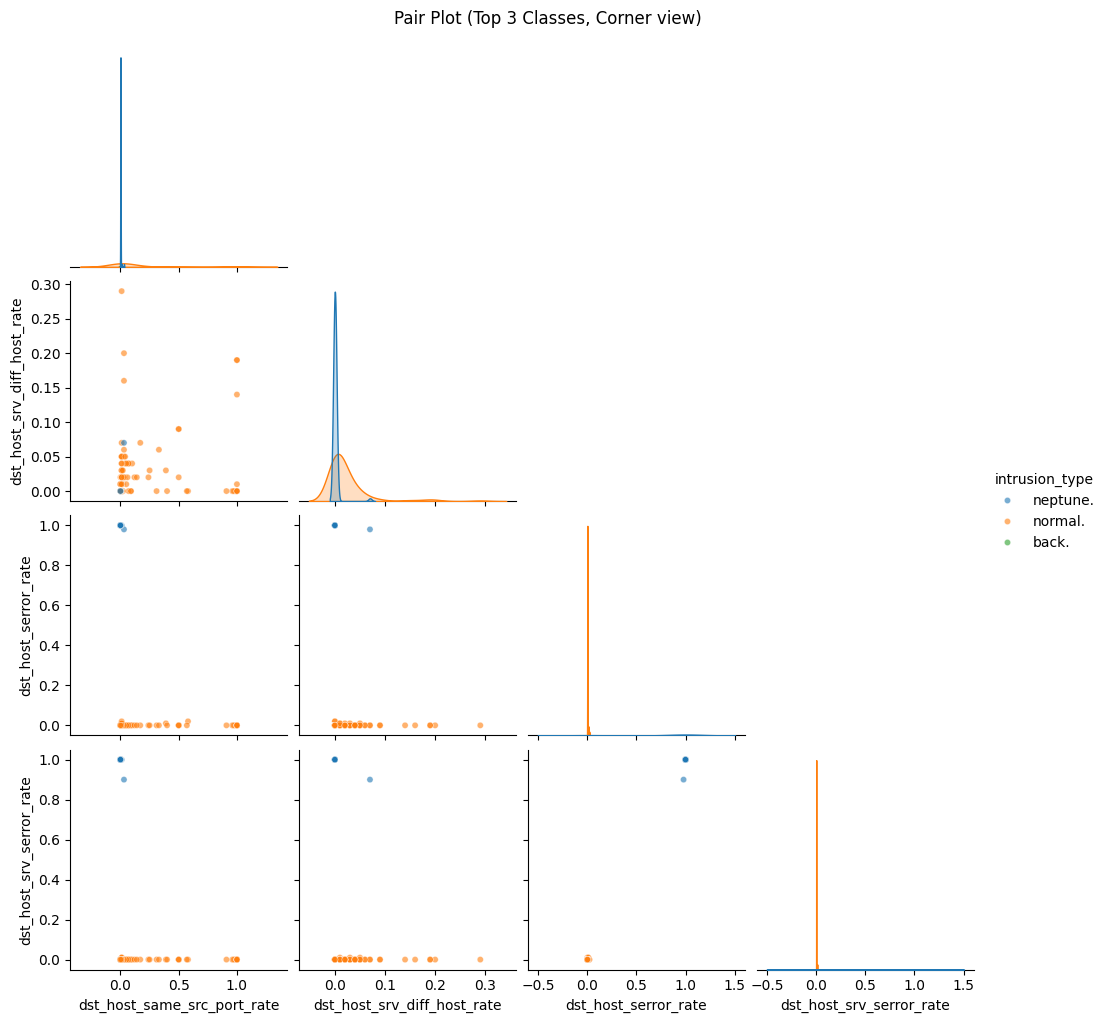

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample only 200 rows from a filtered dataset containing top 3 intrusion types
top_classes = df['intrusion_type'].value_counts().nlargest(3).index
df_filtered = df[df['intrusion_type'].isin(top_classes)]
df_sample = df_filtered.sample(n=200, random_state=42)

# Pair plot with reduced data and corner=True to speed up
sns.pairplot(
    df_sample,
    hue='intrusion_type',
    vars=['dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
          'dst_host_serror_rate', 'dst_host_srv_serror_rate'],
    corner=True,  # Skip upper triangle
    plot_kws={'s': 20, 'alpha': 0.6}
)

plt.suptitle("Pair Plot (Top 3 Classes, Corner view)", y=1.02)
plt.show()


In [77]:
# Almost no linear seperabilty in any feature
# Trying PCA and t-sne

In [78]:
# t-sne -> Unsupervised non-linear dimensionality reduction and data visualization algorithm
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, perplexity = 50, max_iter = 1000)

In [79]:
# Preparing dataset for tsne
frames = list()
for label in df['intrusion_type'].unique():
    temp = df[df['intrusion_type'] == label]
    if label == 'normal.' or label == 'neptune.':     
        temp = temp.iloc[:10000, ]
    frames.append(temp)  
temp_df = pd.concat(frames)

# Since t-sne works on numeric attributes only
df_num = temp_df.select_dtypes(include = ['float64', 'int64'])
df_num.shape

(25934, 38)

(500, 2)


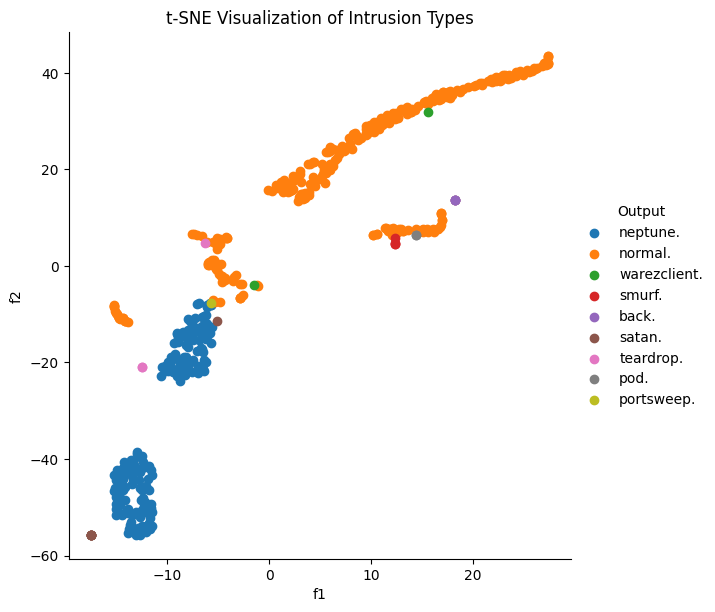

In [80]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Sample a subset of data for faster computation (500 rows)
df_sample = df.sample(n=500, random_state=42)
df_num = df_sample.select_dtypes(include=[np.number])  # Select numeric columns only

# Adjust the number of PCA components based on the number of features in the dataset
n_components = min(50, df_num.shape[1])  # Take the smaller of 50 or the number of features

# Apply PCA for dimensionality reduction before t-SNE
pca = PCA(n_components=n_components)  # Reduce to n_components
df_pca = pca.fit_transform(df_num)

# Initialize t-SNE with parameters (adjust perplexity and number of jobs)
tsne = TSNE(perplexity=30, n_jobs=-1, random_state=42, max_iter=3000)

# Apply t-SNE on the PCA-reduced data
tsne_df = tsne.fit_transform(df_pca)

# Check the shape of the resulting t-SNE transformation
print(tsne_df.shape)

# Create a DataFrame with t-SNE results and the target column ('intrusion_type')
tsne_df = np.vstack((tsne_df.T, df_sample['intrusion_type'].values)).T
tsne_dataset = pd.DataFrame(data=tsne_df, columns=['f1', 'f2', 'Output'])

# Plot using seaborn's FacetGrid with the t-SNE results
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(tsne_dataset, hue='Output', height=6).map(plt.scatter, 'f1', 'f2').add_legend()
plt.title("t-SNE Visualization of Intrusion Types")
plt.show()


In [81]:
# Get t-SNE results and corresponding intrusion types
tsne_only = tsne.fit_transform(df_pca)
intrusion_type = df_sample['intrusion_type'].values.reshape(-1, 1)

# Combine into a DataFrame
combined = np.hstack((tsne_only, intrusion_type))
tsne_dataset = pd.DataFrame(data=combined, columns=['f1', 'f2', 'Output'])


In [82]:
# PCA -> Unsupervised linear dimensionality reduction and data visualization algorithm
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [83]:
# Standardizing the data for PCA
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(df.select_dtypes(include = ['float64', 'int64']))

In [84]:
pca_df = pca.fit_transform(X)
pca_df.shape

(145586, 2)

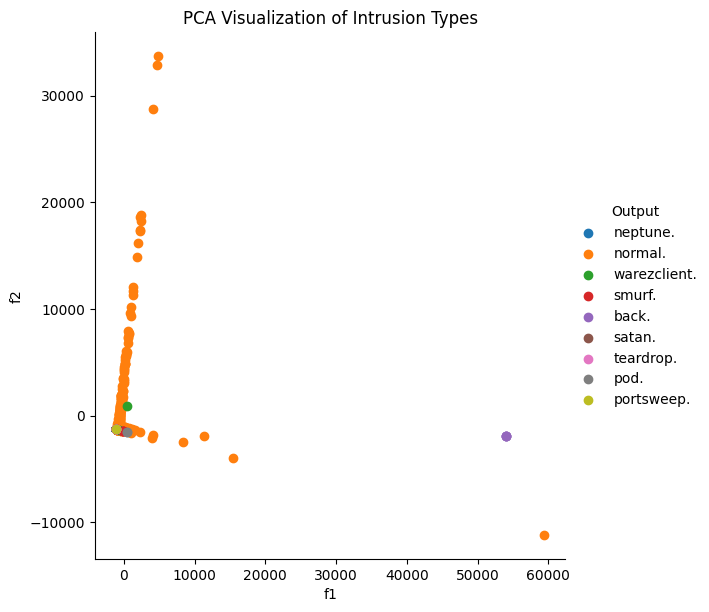

In [85]:
# Select only the numeric columns from the sample
df_sample_num = df_sample.select_dtypes(include=[np.number])

# Perform PCA on the sampled data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_sample_num)

# Stack the PCA result with corresponding intrusion_type values
pca_df = np.hstack((pca_result, df_sample['intrusion_type'].values.reshape(-1, 1)))

# Create a DataFrame with PCA results and Output
pca_dataset = pd.DataFrame(data=pca_df, columns=['f1', 'f2', 'Output'])

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.FacetGrid(pca_dataset, hue='Output', height=6).map(plt.scatter, 'f1', 'f2').add_legend()
plt.title("PCA Visualization of Intrusion Types")
plt.show()


In [86]:
# Understanding various discrete predictors in dataset

In [87]:
pd.crosstab(df.protocol_type, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
protocol_type,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,560,0,0,0,0,103,892,0,0,206,1,0,3,641,0,0,0,0
tcp,968,30,8,53,12,91,19,9,7,51820,30,75789,3,4,0,415,7,733,0,2,0,893,20
udp,0,0,0,0,0,0,0,0,0,0,25,11151,0,0,0,0,3,170,0,0,918,0,0


In [88]:
pd.crosstab(df.root_shell, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
root_shell,,,,,,,,,,,,,,,,,,,,,,,
0,968,12,8,53,12,651,19,6,5,51820,158,87809,0,0,206,416,8,906,641,2,918,893,20
1,0,18,0,0,0,0,0,3,2,0,0,23,3,4,0,0,2,0,0,0,0,0,0


In [89]:
pd.crosstab(df.flag, df.intrusion_type)

intrusion_type,back.,buffer_overflow.,ftp_write.,guess_passwd.,imap.,ipsweep.,land.,loadmodule.,multihop.,neptune.,nmap.,normal.,perl.,phf.,pod.,portsweep.,rootkit.,satan.,smurf.,spy.,teardrop.,warezclient.,warezmaster.
flag,,,,,,,,,,,,,,,,,,,,,,,
OTH,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6,0,0,0,0,0,0,0
REJ,0,0,0,0,0,80,0,0,0,9349,0,4655,0,0,0,74,0,554,0,0,0,0,0
RSTO,0,1,0,45,0,3,0,0,0,446,0,66,0,0,0,7,0,0,0,0,0,1,0
RSTOS0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0
RSTR,90,0,0,4,0,0,0,0,0,0,0,31,0,0,0,299,0,0,0,0,0,1,0
S0,0,0,0,0,1,0,19,0,0,42025,0,51,0,0,0,18,0,164,0,0,0,0,0
S1,2,0,0,0,1,0,0,0,0,0,0,54,0,0,0,0,0,0,0,0,0,0,0
S2,5,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,1,0,0,0,1,0
S3,0,0,0,2,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0


In [90]:
# It is observed:-
# Being the most used protocol, it is observed that TCP has highest number of good and bad connections
# among the given data set

# There are very less number of cases here root shell has been obtained. This is because of the reason
# that root shell is generally used by system administrators only. For attackers, they need to get access
# of the box as user before escalating their privileges to root.

# It was further observed that whenever there was a case of root shell access, buffer overflow attack
# was encountered. Reason being when escalating privileges from user to root, generally only 2 types
# of attack are possible, mis-configuration in permissions or buffer overflows. Buffer overflows
# are more common, as most Kernel exploits are buffer overflows.

# In neptune attacks, the attacker sends a flood of SYN packets and the target sends back SYN-ACK packets
# in reply. From this, the attacker comes to know that target is alive and sends packet with REJ and S0 flags.
# Furthermore, there are a lot of packets with SF flags in normal secure connections.

# Model Building

In [91]:
# In this project, we will solve the Intrusion detection problem as a Binary Classification problem,
# where we will consider points belonging to class "Normal" as one class(Positive Class) and points
# belonging to the remaining 22 classes as the second class(Negative Class).

# The reason we are converting this problem to a binary classification problem is because organisations
# are more concerned about Normal and Bad connections getting classified correctly rather than each of
# the bad categories getting misclassified so that no Bad connections are allowed to gain access to the
# internal network of the organisation by getting misclassified as a Normal connection which may otherwise
# result in a security threat.

# Target is our final columns to be predicted
target = []
for label in df['intrusion_type'].values:
    if label == 'normal.':
        target.append(1)
    else:
        target.append(0)

In [92]:
# Some utility functions

# train-test split function with stratify feature to maintain class distribution
def train_test(df, stratify_col, split):
    train_indices, test_indices = np.array([]), np.array([])
    
    for class_name, val in df[stratify_col].value_counts().iteritems(): 
        class_samples_indices = df[df[stratify_col] == class_name].index.values
        
        class_test_indices = np.random.choice(class_samples_indices,
                            size = int(np.ceil(split * val)), replace = False)
        class_train_indices = np.setdiff1d(class_samples_indices, class_test_indices)
        
        test_indices = np.append(test_indices, class_test_indices)
        train_indices = np.append(train_indices, class_train_indices)

    print(test_indices.shape, train_indices.shape)
    x_train = df.iloc[train_indices, :-1]
    y_train = df.iloc[train_indices, -1]
    x_test = df.iloc[test_indices, :-1]
    y_test = df.iloc[test_indices, -1]
    
    return x_train, y_train, x_test, y_test

# Prints confusion matrix and returns FP
def confusion_matrix(y_test, y_pred, model):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_test)):
        # If it's normal and predicted as normal
        if y_test[i] == 1 and y_pred[i] == 1:
            tp += 1
        
        # If it's bad and predicted as bad
        if y_test[i] == 0 and y_pred[i] == 0:
            tn += 1
            
        # If it's bad but predicted as normal
        if y_test[i] == 0 and y_pred[i] == 1:
            fp += 1
            
        # If it's normal but predicted as bad
        if y_test[i] == 1 and y_pred[i] == 0:
            fn += 1
            
    matrix = [[tn, fp], [fn, tp]]
    cm_df = pd.DataFrame(matrix)
    labels = ['BAD', 'NORMAL']
    plt.figure(figsize=(3,3))
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.title(model)
    plt.show()
    
    return fp

# To calculate accuracy
def accuracy(y_test, y_pred):
    return round(np.sum(y_test == y_pred)/y_test.shape[0] * 100, 2)

## Gaussian naive bayes

In [93]:
# Preparing dataset for gaussian naive bayes

df_gnb = df.select_dtypes(include = ['float64', 'int64'])

# Minimum percentage of variance we want to be described by the resulting transformed components
var_threshold = 0.98
pca_obj = PCA(n_components=var_threshold)
num_features_transformed = pca_obj.fit_transform(StandardScaler().fit_transform(df_gnb)) 

df_gnb = pd.DataFrame(num_features_transformed)
df_gnb['target'] = target

df_gnb.to_pickle('gnb_dataset.pkl')

In [94]:
# GNB Model

class GNB:
    def __init__(self, prior=None, n_class=None, mean=None, variance = None, classes=None):
        self.prior = prior
        self.n_class = n_class
        self.mean = mean
        self.variance = variance
        self.classes = classes

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.mean = np.array(x.groupby(by=y).mean())
        self.variance = np.array(x.groupby(by=y).var())
        self.n_class = len(np.unique(self.y))
        self.classes = np.unique(self.y)
        self.prior = 1/self.n_class

    def calc_mean_var(self):
        m = np.array(self.mean)
        v = np.array(self.variance)

        self.mean_var = []
        for i in range(len(m)):
            m_row = m[i]
            v_row = v[i]
            for a, b in enumerate(m_row):
                mean = b
                var = v_row[a]
                self.mean_var.append([mean, var])
        return self.mean_var

    def split(self):
        spt = np.vsplit(np.array(self.calc_mean_var()), self.n_class)
        return spt

    def gnb_base(self, x_val, x_mean, x_var):
        self.x_val = x_val
        self.x_mean = x_mean
        self.x_var = x_var
        
        pi = np.pi
        equation_1 = 1/(np.sqrt(2 * pi * x_var))
        denom = 2 * x_var
        numerator = (x_val - x_mean) ** 2
        expo = np.exp(-(numerator/denom))
        prob = equation_1 * expo

        return prob

    def predict(self, X):
        self.X = X
        split_class = self.split()
        prob = []
        for i in range(self.n_class):
            class_one = split_class[i]
            for i in range(len(class_one)):
                class_one_x_mean = class_one[i][0]
                class_one_x_var = class_one[i][1]
                x_value = X[i] 
                prob.append([self.gnb_base(x_value, class_one_x_mean, class_one_x_var)])

        prob_array = np.array(prob)
        prob_split = np.vsplit(prob_array, self.n_class)
        final_probabilities = []
        for i in prob_split:
            class_prob = np.prod(i) * self.prior
            final_probabilities.append(class_prob)

        maximum_prob = max(final_probabilities)
        prob_index = final_probabilities.index(maximum_prob)
        prediction = self.classes[prob_index]
        return prediction

## Decision Tree

In [95]:
# Preparing dataset for decision tree

df_dt = df.drop('intrusion_type', axis = 1)
df_dt['target'] = target
df_dt.to_pickle('dt_dataset.pkl')

In [96]:
# DT Model

def unique_vals(rows, col):
    return set([row[col] for row in rows])

def class_counts(rows):
    counts = {} 
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

class Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

def partition(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

def info_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

def find_best_split(rows):
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature
        values = set([row[col] for row in rows])  # unique values in the column
        for val in values:  # for each value
            question = Question(col, val)
  
            true_rows, false_rows = partition(rows, question)

            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

class Leaf:
    def __init__(self, rows):
        self.predictions = class_counts(rows)

class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

def build_tree(rows):
    gain, question = find_best_split(rows)
    if gain == 0:
        return Leaf(rows)
    
    true_rows, false_rows = partition(rows, question)

    true_branch = build_tree(true_rows)
    false_branch = build_tree(false_rows)

    return Decision_Node(question, true_branch, false_branch)

def classify(row, node):
    if isinstance(node, Leaf):
        return node.predictions

    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

## XGBoost

In [97]:
# Preparing dataset for xgboost

df_xgb = df.select_dtypes(include = ['float64', 'int64'])

# Minimum percentage of variance we want to be described by the resulting transformed components
var_threshold = 0.98
pca_obj = PCA(n_components=var_threshold)
num_features_transformed = pca_obj.fit_transform(StandardScaler().fit_transform(df_xgb)) 

df_xgb = pd.DataFrame(num_features_transformed)

# Vectorizing Categorical features using one-hot encoding
# Categorical features in our dataset are -> 'protocol_type', 'service', and 'flag'

from sklearn.feature_extraction.text import CountVectorizer

# protocol_type
vocab = list(set(list(df['protocol_type'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
protocol_final = one_hot.fit_transform(df['protocol_type'].values)

# service
vocab = list(set(list(df['service'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
service_final = one_hot.fit_transform(df['service'].values)

# flag
vocab = list(set(list(df['flag'].values)))
one_hot = CountVectorizer(vocabulary=vocab, binary=True)
flag_final = one_hot.fit_transform(df['flag'].values)

# Merging categorical and numeric features
from scipy.sparse import hstack
df_xgb = hstack((df_xgb, protocol_final, service_final, flag_final))
df_xgb = pd.DataFrame(df_xgb.toarray())
df_xgb['target'] = target
df_xgb.to_pickle('xgb_dataset.pkl')

In [98]:
# XGB Model
from xgboost import XGBClassifier

# Model Training & Testing

In [99]:
from collections import defaultdict
  
results = defaultdict(list)

### Gaussian naive bayes

Accuracy: 96.67%
Confusion Matrix:
[[11049   501]
 [  470 17096]]


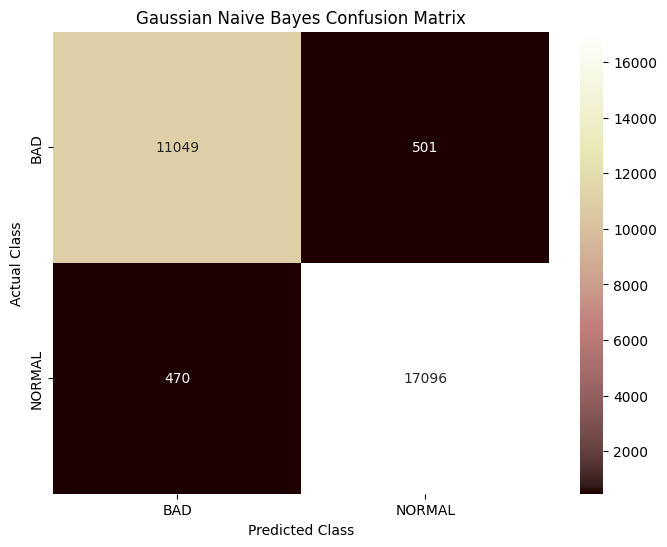

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB as GNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def train_test(df, stratify_col, split):
    train_indices, test_indices = np.array([]), np.array([])
    for class_name, val in df[stratify_col].value_counts().items():
        class_samples_indices = df[df[stratify_col] == class_name].index.values
        n_samples = len(class_samples_indices)
        n_test_samples = int(n_samples * split)
        test_indices_for_class = np.random.choice(class_samples_indices, size=n_test_samples, replace=False)
        train_indices_for_class = np.setdiff1d(class_samples_indices, test_indices_for_class)
        train_indices = np.concatenate((train_indices, train_indices_for_class))
        test_indices = np.concatenate((test_indices, test_indices_for_class))

    train_df = df.loc[train_indices]
    test_df = df.loc[test_indices]

    x_train = train_df.iloc[:, :-1]
    y_train = train_df.iloc[:, -1]
    x_test = test_df.iloc[:, :-1]
    y_test = test_df.iloc[:, -1]

    return x_train, y_train, x_test, y_test

# Assuming 'results' dictionary is initialized
results = {}

# Load the dataset
df = pd.read_pickle('gnb_dataset.pkl')

# Train-test split
x_train, y_train, x_test, y_test = train_test(df=df, stratify_col='target', split=0.20)

# Initialize the Gaussian Naive Bayes classifier
gaussian_classifier = GNB()
gaussian_classifier.fit(x_train, y_train)

# Predict using the test set
preds = []
for test in x_test.values:
    test = test.reshape(1, -1)  # Reshape to 2D array (one sample, multiple features)
    preds.append(gaussian_classifier.predict(test)[0]) # Extract the single prediction

y_pred = np.array(preds)

# Calculate accuracy
acc = accuracy_score(y_test.values, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test.values, y_pred) # Changed fp to cm
print(f"Confusion Matrix:\n{cm}")

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink',
            xticklabels=['BAD', 'NORMAL'], yticklabels=['BAD', 'NORMAL'])  # Adjust labels if needed
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# Store results
results['Gaussian Naive Bayes'] = [f"{acc * 100:.2f}%", cm.tolist()] # Changed fp to cm

### Decision Tree

Accuracy: 99.61%


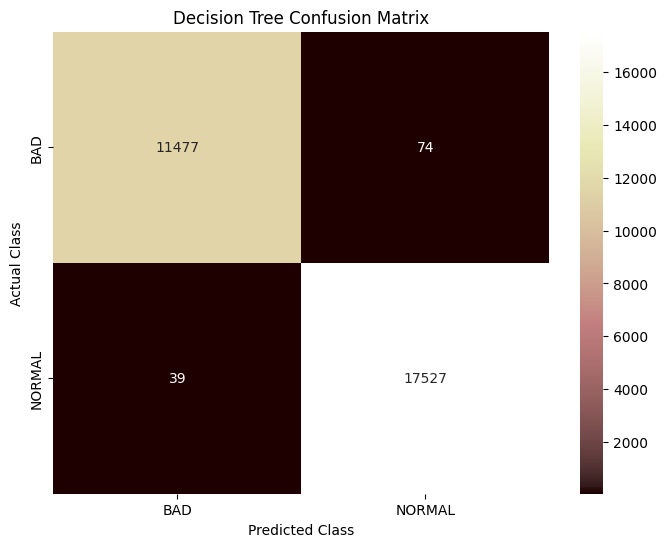

In [101]:
df = pd.read_pickle('dt_dataset.pkl')
df = df.sample(frac=1).reset_index(drop=True)

# As training on large dataset takes time, thus reducing the training set
training_data = df.iloc[:10000, :].values.tolist()
testing_data = df.iloc[int(np.ceil(.80 * df.shape[0])):, :].values.tolist()

my_tree = build_tree(training_data)

actual, predicted = [], []
for row in testing_data:
    actual.append(row[-1])
    predicted.append(sorted(classify(row, my_tree).items(), key=lambda x: x[1], reverse=True)[0][0])

acc = accuracy_score(np.array(actual), np.array(predicted))
cm = confusion_matrix(np.array(actual), np.array(predicted))  # Changed fp to cm

print(f"Accuracy: {acc * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink',
            xticklabels=['BAD', 'NORMAL'], yticklabels=['BAD', 'NORMAL'])  # Adjust labels if needed
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# Results
results['Decision Tree'] = [f"{acc * 100:.2f}%", cm.tolist()] # Changed fp to cm

### XGBoost

Accuracy: 99.87%


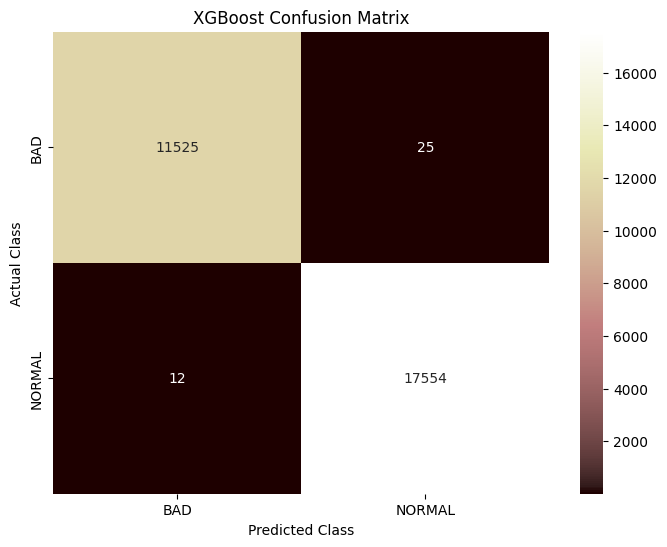

In [102]:
# Load data and split
df = pd.read_pickle('xgb_dataset.pkl')
x_train, y_train, x_test, y_test = train_test(df=df, stratify_col='target', split=0.20)

# Train XGBoost
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculate metrics
acc = accuracy_score(y_test.values, y_pred)
cm = confusion_matrix(y_test.values, y_pred)

# Print accuracy
print(f"Accuracy: {acc * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink',
            xticklabels=['BAD', 'NORMAL'], yticklabels=['BAD', 'NORMAL'])  # Adjust labels if needed
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# Store results
results['XGBoost'] = [f"{acc * 100:.2f}%", cm.tolist()]

### Max-Voting Ensemble Technique

Accuracy: 99.88%
Confusion Matrix for Max Voting:
[[14650    28]
 [    8 14431]]


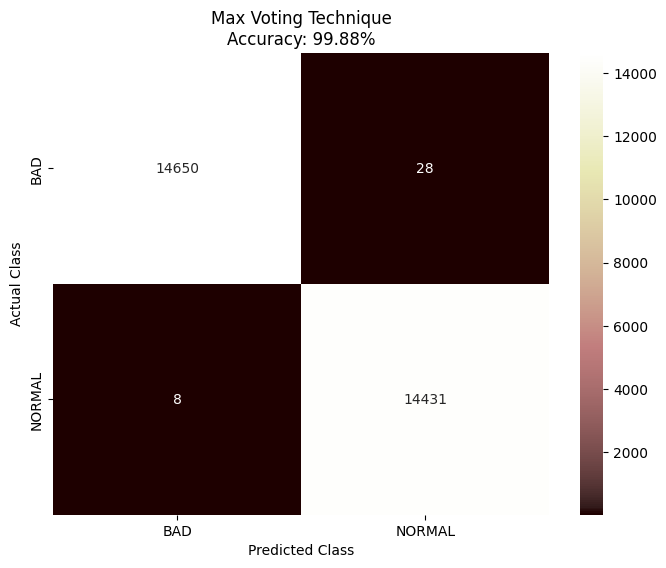

In [103]:
from sklearn.metrics import accuracy_score
# Vote from GNB
df_gnb = pd.read_pickle('gnb_dataset.pkl')
preds_gnb = []
test_set_gnb = df_gnb.iloc[int(np.ceil(.80 * df_gnb.shape[0])):, :-1]
for test in test_set_gnb.values:
    preds_gnb.append(gaussian_classifier.predict(test.reshape(1, -1))[0])
gnb_preds = np.array(preds_gnb)

# Vote from DT
df_dt = pd.read_pickle('dt_dataset.pkl')
test_set_dt = df_dt.iloc[int(np.ceil(.80 * df_dt.shape[0])):, :].values.tolist()
predicted_dt = []
for row in test_set_dt:
    predicted_dt.append(sorted(classify(row, my_tree).items(), key=lambda x: x[1], reverse=True)[0][0])
dt_preds = np.array(predicted_dt)

# Vote from XGBoost
df_xgb = pd.read_pickle('xgb_dataset.pkl')
test_set_xgb = df_xgb.iloc[int(np.ceil(.80 * df_xgb.shape[0])):, :-1]
xgb_preds = model.predict(test_set_xgb)

# Max-voting ensemble technique
# Ensure all prediction arrays have the same length
min_len = min(len(gnb_preds), len(dt_preds), len(xgb_preds))
gnb_preds_truncated = gnb_preds[:min_len]
dt_preds_truncated = dt_preds[:min_len]
xgb_preds_truncated = xgb_preds[:min_len]

y_test_pred_maxvote = []
for i in range(min_len):
    votes = [gnb_preds_truncated[i], dt_preds_truncated[i], xgb_preds_truncated[i]]
    # Handle potential None values from Decision Tree predictions
    valid_votes = [vote for vote in votes if vote is not None]
    if valid_votes:
        y_test_pred_maxvote.append(np.bincount(np.array(valid_votes)).argmax())
    else:
        y_test_pred_maxvote.append(None)

max_vote_preds = np.array(y_test_pred_maxvote)

# Evaluation
df_eval = df_gnb.iloc[int(np.ceil(.80 * df_gnb.shape[0])):, :] # Use one of the df for y_test
y_test_eval = df_eval.iloc[:min_len, -1].values
valid_max_vote_mask = max_vote_preds != None

acc = accuracy_score(y_test_eval[valid_max_vote_mask], max_vote_preds[valid_max_vote_mask]) if np.any(valid_max_vote_mask) else 0.0
cm_ensemble = confusion_matrix(y_test_eval[valid_max_vote_mask], max_vote_preds[valid_max_vote_mask]) if np.any(valid_max_vote_mask) else np.array([[0, 0], [0, 0]])

print(f"Accuracy: {acc * 100:.2f}%")
print(f"Confusion Matrix for Max Voting:\n{cm_ensemble}")

# Results
results['Max Voting Technique'] = [f"{acc * 100:.2f}%", cm_ensemble.tolist()]

# Plotting Confusion Matrix for Max Voting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='pink',
            xticklabels=['BAD', 'NORMAL'], yticklabels=['BAD', 'NORMAL'])
plt.title(f'Max Voting Technique\nAccuracy: {acc * 100:.2f}%')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [104]:
# from prettytable import PrettyTable

# x = PrettyTable()
# x.field_names = ["Technique", "Accuracy", "False Positives"]
# for technique, res in results.items():
#     x.add_row([technique, res[0], res[1]])
# print(x)

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Technique", "Accuracy", "Confusion Matrix (Detailed)"]

for technique, res in results.items():
    confusion = res[1]
    TP = confusion[0][0]
    FN = confusion[0][1]
    FP = confusion[1][0]
    TN = confusion[1][1]
    
    confusion_text = f"TruePositive: {TP}, FalseNegative: {FN}, FalsePositive: {FP}, TrueNegative: {TN}"
    x.add_row([technique, res[0], confusion_text])

print(x)

+----------------------+----------+----------------------------------------------------------------------------------+
|      Technique       | Accuracy |                           Confusion Matrix (Detailed)                            |
+----------------------+----------+----------------------------------------------------------------------------------+
| Gaussian Naive Bayes |  96.67%  | TruePositive: 11049, FalseNegative: 501, FalsePositive: 470, TrueNegative: 17096 |
|    Decision Tree     |  99.61%  |  TruePositive: 11477, FalseNegative: 74, FalsePositive: 39, TrueNegative: 17527  |
|       XGBoost        |  99.87%  |  TruePositive: 11525, FalseNegative: 25, FalsePositive: 12, TrueNegative: 17554  |
| Max Voting Technique |  99.88%  |  TruePositive: 14650, FalseNegative: 28, FalsePositive: 8, TrueNegative: 14431   |
+----------------------+----------+----------------------------------------------------------------------------------+


In [105]:
# Suppose your ML model is named 'classifier' and is trained above

def predict(log_data):
    # Here you replace the placeholder with actual model inference logic.
    # Example:
    # pred = classifier.predict(log_data)
    # status = "normal" if pred == 0 else "anomalous"
    # confidence = classifier.predict_proba(log_data)[pred]
    # details = "No suspicious activity" if status == "normal" else "Possible intrusion detected"
    return { "status": "normal", "confidence": 0.95, "details": "No suspicious activity" }


In [106]:
def predict_csv(df):
    n = len(df)
    normal_count = n  # Placeholder: treat all as normal
    anomaly_count = 0
    confidence = normal_count / n if n > 0 else 0
    status = "normal" if anomaly_count == 0 else "anomalous"
    details = "No suspicious activity" if anomaly_count == 0 else f"{anomaly_count} anomalies detected"
    return type('obj', (object,), {
        'status': status,
        'confidence': confidence,
        'details': details
    })